# MLP

## 导入库

In [1]:
import torch
from torch import nn
from torch import optim
import torchvision
from torchvision import transforms
import matplotlib.pyplot as plt

## 载入数据

In [2]:
train_dataset = torchvision.datasets.MNIST(
    root='./data',
    train=True,
    transform=transforms.ToTensor(),
    download=False
)

test_dataset = torchvision.datasets.MNIST(
    root='./data',
    train=False,
    transform=transforms.ToTensor()
)

train_dataset

Dataset MNIST
    Number of datapoints: 60000
    Split: train
    Root Location: ./data
    Transforms (if any): ToTensor()
    Target Transforms (if any): None

## 查看数据

torch.Size([60000, 28, 28])
torch.Size([60000])
label: 3


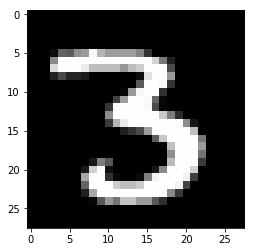

In [3]:
print(train_dataset.train_data.size())
print(train_dataset.train_labels.size())
print('label: %d' % train_dataset.train_labels[12].item())
plt.imshow(train_dataset.train_data[12],  cmap='gray')
plt.show()

## 构建数据迭代器

In [4]:
batch_size = 100
train_loader = torch.utils.data.DataLoader(
    dataset=train_dataset,
    batch_size=batch_size,
    shuffle=True
)
test_loader = torch.utils.data.DataLoader(
    dataset=test_dataset,
    batch_size=batch_size,
    shuffle=False,
    drop_last=True
)
train_loader

## MLP模型

In [5]:
input_size = 28*28
target_size = 10

In [6]:
# Sequential 方式
model = nn.Sequential(
    nn.Linear(input_size, 500),
    nn.ReLU(),
    nn.Linear(500, target_size)
)
model

Sequential(
  (0): Linear(in_features=784, out_features=500, bias=True)
  (1): ReLU()
  (2): Linear(in_features=500, out_features=10, bias=True)
)

In [7]:
# class类方式
class Mlp(nn.Module):
    def __init__(self, input_size, target_size):
        super(Mlp, self).__init__()
        self.fc1 = nn.Linear(input_size, 500)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(500, target_size)
        
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out
model = Mlp(input_size, target_size)
model

Mlp(
  (fc1): Linear(in_features=784, out_features=500, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=500, out_features=10, bias=True)
)

In [8]:
if torch.cuda.is_available():
    model = model.cuda()

## 损失函数
$loss=-\frac{1}{m}\sum{log\ p_i}$

In [9]:
# nn.CrossEntropyLoss = nn.LogSoftmax() + nn.LLLoss()
loss = nn.CrossEntropyLoss()
loss

CrossEntropyLoss()

## 优化算子

In [10]:
learning_rate = 0.001
optimizer = optim.SGD(model.parameters(), lr=learning_rate)
optimizer

SGD (
Parameter Group 0
    dampening: 0
    lr: 0.001
    momentum: 0
    nesterov: False
    weight_decay: 0
)

## 训练

Epoch[1/10], step[300/600], loss:2.2406
Epoch[1/10], step[600/600], loss:2.1674
Epoch[2/10], step[300/600], loss:2.0929
Epoch[2/10], step[600/600], loss:1.9823
Epoch[3/10], step[300/600], loss:1.9387
Epoch[3/10], step[600/600], loss:1.8436
Epoch[4/10], step[300/600], loss:1.6919
Epoch[4/10], step[600/600], loss:1.6062
Epoch[5/10], step[300/600], loss:1.4665
Epoch[5/10], step[600/600], loss:1.4302
Epoch[6/10], step[300/600], loss:1.2524
Epoch[6/10], step[600/600], loss:1.2746
Epoch[7/10], step[300/600], loss:1.1561
Epoch[7/10], step[600/600], loss:1.0070
Epoch[8/10], step[300/600], loss:1.0706
Epoch[8/10], step[600/600], loss:1.0946
Epoch[9/10], step[300/600], loss:0.8550
Epoch[9/10], step[600/600], loss:0.9018
Epoch[10/10], step[300/600], loss:0.8693
Epoch[10/10], step[600/600], loss:0.7909


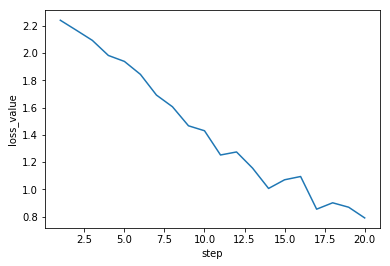

In [11]:
num_epochs = 10
loss_results = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.view(-1, 28*28)
        if torch.cuda.is_available():
            images = images.cuda()
            labels = labels.cuda()
            
        # forward
        outputs = model(images)
        loss_value = loss(outputs, labels)
        
        # backward
        optimizer.zero_grad()
        loss_value.backward()
        optimizer.step()
        
        if (i+1) % 300 == 0:
            print('Epoch[%d/%d], step[%d/%d], loss:%.4f' % 
                  (epoch+1, num_epochs, i+1, len(train_loader), loss_value.item()))
            loss_results.append(loss_value.item())

# 绘图
plt.plot(range(1, len(loss_results)+1), loss_results)
plt.xlabel('step')
plt.ylabel('loss_value')
plt.show()      

## 测试

In [12]:
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.view(-1, 28*28)
        if torch.cuda.is_available():
            images = images.cuda()
            labels = labels.cuda()
        
        outputs = model(images)
        _, predicted = torch.max(outputs.data, dim=1)
        total += images.size(0)
        correct += (labels == predicted).sum().item()
    print('Accuracy on the test data: %.4f' % (correct/total))

Accuracy on the test data: 0.8400
